In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df = df[['YearsExperience','Salary']].copy()
df.info()
df['Salary'] = df['Salary'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 492.0 bytes


In [23]:
x = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

q0 = 0
q1 = 0
alpha = 0.05

def predict(q0,q1,x):
    return q0+q1*x
    
def error_function(pv, av):
    return pv-av

def gradient_descent(q0,q1,alpha,epoches,x,y):
    m = len(x)
    for i in range(epoches): 
        y_pred = predict(q0, q1, x)
        er = error_function(y_pred,y)
        
        gradient_q0 = (1/m) * np.sum(er)
        gradient_q1 = (1/m) * np.sum(er * x)
        # This is gradient descent
        q0 -= alpha * (1/m) * gradient_q0
        q1 -= alpha * (1/m) * gradient_q1
        # This is Stochastic Coordinate Descent
        # Q0 = Q0 - alpha * (1/m) * np.sum(error_function(predict(Q0, Q1, x), y))
        # Q1 = Q1 - alpha * (1/m) * np.sum(error_function(predict(Q0, Q1, x), y) * x)
        
    return q0,q1

q0, q1 = gradient_descent(q0, q1, alpha, 1000, x, y)
print(q0, q1)
        

24713.457427179725 9469.738680950619


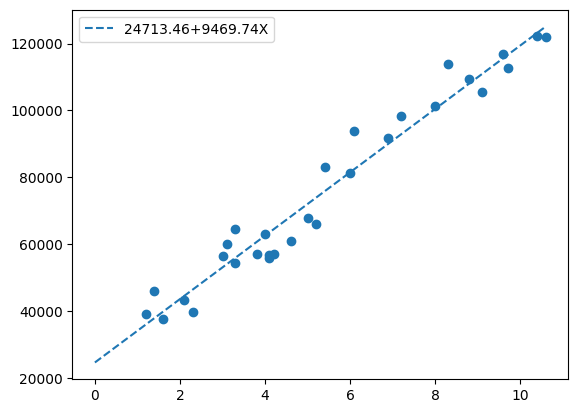

In [24]:
plt.scatter(x,y)

# optimal 24713.457427179725 9469.738680950619 for 15000 epoches

xl = np.linspace(0,max(x),100)
yl = round(q0,2)+round(q1,2)*xl
plt.plot(xl,yl,label = f'{round(q0,2)}+{round(q1,2)}X', linestyle = '--')
plt.legend()
plt.show()